In [1]:
import pandas
import matplotlib.pyplot as plt



import numpy
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

## 1. Load the data

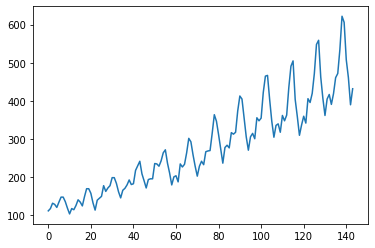

In [2]:

dataset = pandas.read_csv('airline-passengers.csv', usecols=[1], engine='python')
plt.plot(dataset)
plt.show()

In [3]:
# load the dataset
dataframe = pandas.read_csv('airline-passengers.csv', usecols=[1], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')

In [4]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

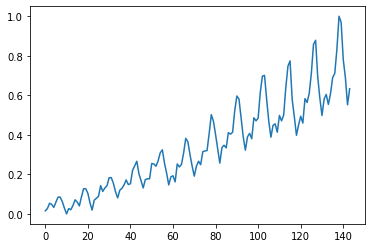

In [5]:
plt.plot(dataset)
plt.show()

## 2. Preprocess data

In [6]:
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

96 48


In [7]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [8]:
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [9]:
trainX.shape

(94, 1)

The LSTM network expects the input data (X) to be provided with a specific array structure in the form of: [samples, time steps, features].

Currently, our data is in the form: [samples, features] and we are framing the problem as one time step for each sample. We can transform the prepared train and test input data into the expected structure using numpy.reshape() as follows:

In [10]:
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
trainX.shape

(94, 1, 1)

## 3. Run LSTM

In [11]:
# create and fit the LSTM network
model = Sequential()
# model.add(LSTM(4, input_shape=(1, look_back))) # 4 hidden units (fully connected)
model.add(Dense(1)) # all 4 units to a single output
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
94/94 - 20s - loss: 0.0856
Epoch 2/100
94/94 - 0s - loss: 0.0535
Epoch 3/100
94/94 - 0s - loss: 0.0369
Epoch 4/100
94/94 - 0s - loss: 0.0287
Epoch 5/100
94/94 - 0s - loss: 0.0249
Epoch 6/100
94/94 - 0s - loss: 0.0229
Epoch 7/100
94/94 - 0s - loss: 0.0216
Epoch 8/100
94/94 - 0s - loss: 0.0206
Epoch 9/100
94/94 - 0s - loss: 0.0198
Epoch 10/100
94/94 - 0s - loss: 0.0190
Epoch 11/100
94/94 - 0s - loss: 0.0181
Epoch 12/100
94/94 - 0s - loss: 0.0173
Epoch 13/100
94/94 - 0s - loss: 0.0166
Epoch 14/100
94/94 - 0s - loss: 0.0157
Epoch 15/100
94/94 - 0s - loss: 0.0150
Epoch 16/100
94/94 - 0s - loss: 0.0143
Epoch 17/100
94/94 - 0s - loss: 0.0137
Epoch 18/100
94/94 - 0s - loss: 0.0129
Epoch 19/100
94/94 - 0s - loss: 0.0122
Epoch 20/100
94/94 - 0s - loss: 0.0116
Epoch 21/100
94/94 - 0s - loss: 0.0110
Epoch 22/100
94/94 - 0s - loss: 0.0104
Epoch 23/100
94/94 - 0s - loss: 0.0098
Epoch 24/100
94/94 - 0s - loss: 0.0093
Epoch 25/100
94/94 - 0s - loss: 0.0088
Epoch 26/100
94/94 - 0s - loss: 0

In [12]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

ValueError: Found array with dim 3. Estimator expected <= 2.

In [ ]:
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()